# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Sat Mar  7 14:35:21 2020


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Mar  7 14:35:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 440.59       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   64C    P0    41W /  N/A |    549MiB /  8117MiB |      8%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# if ram_gb < 20:
#   print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
#   print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
#   print('re-execute this cell.')
# else:
#   print('You are using a high-RAM runtime!')

In [4]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import matplotlib.pyplot as plt
import numpy as np
import src.utils.utils as utils
import src.models.train_model as train
%matplotlib inline

%config IPCompleter.greedy=True

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()

train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()



In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)


Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)

train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


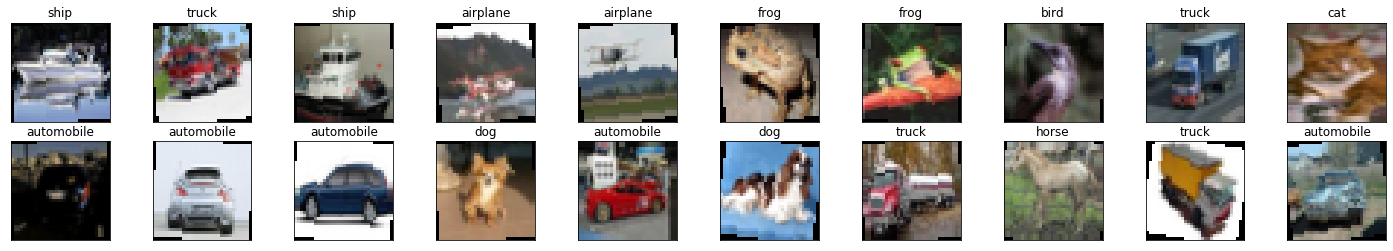

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# obtain one batch of training images
dataiterator = iter(train_loader)
images, labels = dataiterator.next()
images = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks=[], yticks=[])
    utils.Utils.imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [10]:
cnn_model, device = utils.Utils.createmodel()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,056
DepthwiseSeparableConv2d-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
          Dropout-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 30, 30]          18,432
      BatchNorm2d-12           [-1, 64, 30, 30]             128
             ReLU-13           [-1, 64, 30, 30]               0
          Dropout-14        

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.1, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=5,
                                        verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 25
for epoch in range(0, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader,batch_size=batch_size,class_correct=class_correct,class_total=class_total)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.1135581731796265 Batch_id=390 Accuracy=45.23: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 4818/10000 (48.18%)

Learning rate = 0.1  for epoch:  1
EPOCH: 1


Loss=1.1378376483917236 Batch_id=390 Accuracy=60.90: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5764/10000 (57.64%)

Learning rate = 0.1  for epoch:  2
EPOCH: 2


Loss=0.779267430305481 Batch_id=390 Accuracy=66.85: 100%|██████████| 391/391 [00:28<00:00, 13.70it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 6349/10000 (63.49%)

Learning rate = 0.1  for epoch:  3
EPOCH: 3


Loss=0.9334738850593567 Batch_id=390 Accuracy=69.93: 100%|██████████| 391/391 [00:28<00:00, 13.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 6974/10000 (69.74%)

Learning rate = 0.1  for epoch:  4
EPOCH: 4


Loss=0.6936432123184204 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:28<00:00, 13.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7238/10000 (72.38%)

Learning rate = 0.1  for epoch:  5
EPOCH: 5


Loss=0.7633376717567444 Batch_id=390 Accuracy=73.90: 100%|██████████| 391/391 [00:28<00:00, 13.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7316/10000 (73.16%)

Learning rate = 0.1  for epoch:  6
EPOCH: 6


Loss=0.7547543048858643 Batch_id=390 Accuracy=74.92: 100%|██████████| 391/391 [00:29<00:00, 13.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7429/10000 (74.29%)

Learning rate = 0.1  for epoch:  7
EPOCH: 7


Loss=0.7606381177902222 Batch_id=390 Accuracy=75.73: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7350/10000 (73.50%)

Learning rate = 0.1  for epoch:  8
EPOCH: 8


Loss=0.6570776700973511 Batch_id=390 Accuracy=76.43: 100%|██████████| 391/391 [00:30<00:00, 12.81it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7608/10000 (76.08%)

Learning rate = 0.1  for epoch:  9
EPOCH: 9


Loss=0.682857096195221 Batch_id=390 Accuracy=77.30: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7503/10000 (75.03%)

Learning rate = 0.1  for epoch:  10
EPOCH: 10


Loss=0.5784199833869934 Batch_id=390 Accuracy=77.81: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7552/10000 (75.52%)

Learning rate = 0.1  for epoch:  11
EPOCH: 11


Loss=0.6516640782356262 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7743/10000 (77.43%)

Learning rate = 0.1  for epoch:  12
EPOCH: 12


Loss=0.6143432259559631 Batch_id=390 Accuracy=78.90: 100%|██████████| 391/391 [00:30<00:00, 12.79it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7644/10000 (76.44%)

Learning rate = 0.1  for epoch:  13
EPOCH: 13


Loss=0.5900453329086304 Batch_id=390 Accuracy=79.32: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7822/10000 (78.22%)

Learning rate = 0.1  for epoch:  14
EPOCH: 14


Loss=0.4847686290740967 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7632/10000 (76.32%)

Learning rate = 0.1  for epoch:  15
EPOCH: 15


Loss=0.6237747073173523 Batch_id=390 Accuracy=80.11: 100%|██████████| 391/391 [00:31<00:00, 12.28it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7783/10000 (77.83%)

Learning rate = 0.1  for epoch:  16
EPOCH: 16


Loss=0.6489702463150024 Batch_id=390 Accuracy=80.52: 100%|██████████| 391/391 [00:31<00:00, 12.27it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8067/10000 (80.67%)

Learning rate = 0.1  for epoch:  17
EPOCH: 17


Loss=0.3154694139957428 Batch_id=390 Accuracy=80.94: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7818/10000 (78.18%)

Learning rate = 0.1  for epoch:  18
EPOCH: 18


Loss=0.4771263003349304 Batch_id=390 Accuracy=81.39: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 7989/10000 (79.89%)

Learning rate = 0.1  for epoch:  19
EPOCH: 19


Loss=0.4556049704551697 Batch_id=390 Accuracy=81.62: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8073/10000 (80.73%)

Learning rate = 0.1  for epoch:  20
EPOCH: 20


Loss=0.6175566911697388 Batch_id=390 Accuracy=81.83: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7922/10000 (79.22%)

Learning rate = 0.1  for epoch:  21
EPOCH: 21


Loss=0.40652260184288025 Batch_id=390 Accuracy=82.27: 100%|██████████| 391/391 [00:31<00:00, 12.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8063/10000 (80.63%)

Learning rate = 0.1  for epoch:  22
EPOCH: 22


Loss=0.7470704317092896 Batch_id=390 Accuracy=82.08: 100%|██████████| 391/391 [00:31<00:00, 12.36it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8105/10000 (81.05%)

Epoch    23: reducing learning rate of group 0 to 1.0000e-02.
Learning rate = 0.010000000000000002  for epoch:  23
EPOCH: 23


Loss=0.3983692526817322 Batch_id=390 Accuracy=84.28: 100%|██████████| 391/391 [00:32<00:00, 12.17it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8209/10000 (82.09%)

Learning rate = 0.010000000000000002  for epoch:  24
EPOCH: 24


Loss=0.4907020032405853 Batch_id=390 Accuracy=84.73: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s] 



Test set: Average loss: 0.0040, Accuracy: 8225/10000 (82.25%)

Learning rate = 0.010000000000000002  for epoch:  25


In [13]:
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 75% (1529/2020)
Test Accuracy of automobile: 80% (1570/1951)
Test Accuracy of  bird: 63% (1277/2005)
Test Accuracy of   cat: 66% (1319/1995)
Test Accuracy of  deer: 78% (1536/1965)
Test Accuracy of   dog: 63% (1262/1980)
Test Accuracy of  frog: 82% (1625/1975)
Test Accuracy of horse: 73% (1442/1967)
Test Accuracy of  ship: 87% (1688/1928)
Test Accuracy of truck: 79% (1555/1964)

Test Accuracy (Overall): 74% (14803/19750)


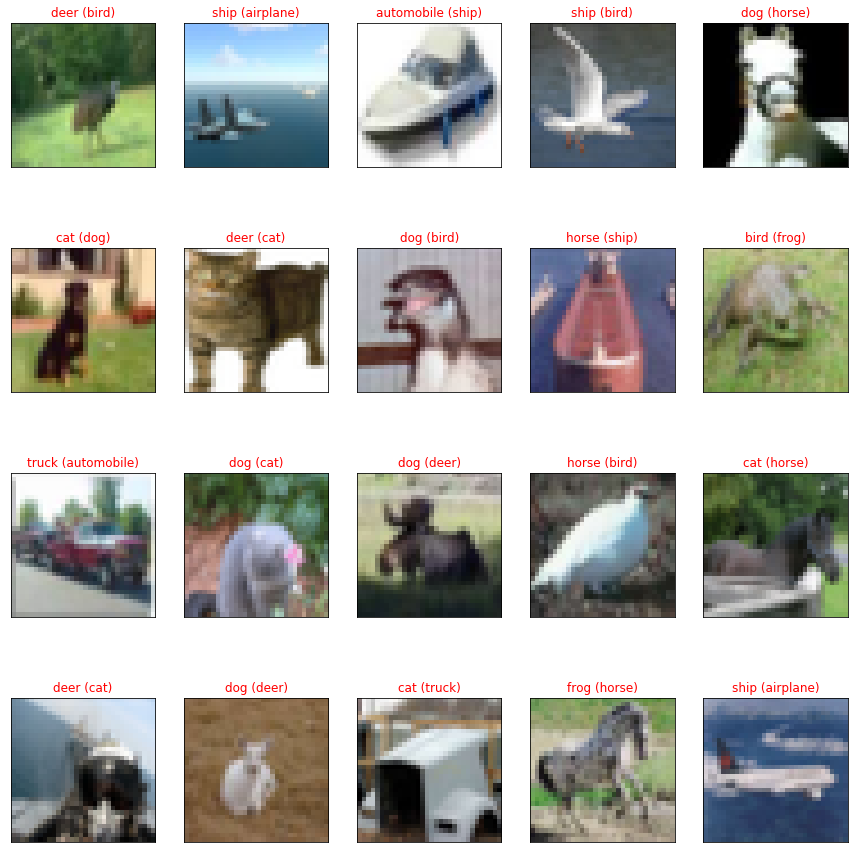

In [14]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda
images = images.cuda()

# get sample outputs
output = cnn_model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(15, 20))

loc = 0
for idx in np.arange(128):
    if preds[idx]!=labels[idx].item() and loc < 25:
        ax = fig.add_subplot(5, 5, loc+1, xticks=[], yticks=[])
        utils.Utils.imshow(images[idx].cpu())
        ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]])
                     ,color="red")
        loc += 1